In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

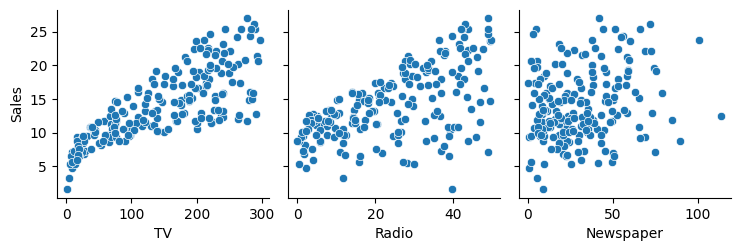

In [14]:
url="https://raw.githubusercontent.com/erkansirin78/datasets/refs/heads/master/Advertising.csv"
df = pd.read_csv(url)
df.head()
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'],y_vars='Sales')
plt.show()

<Axes: >

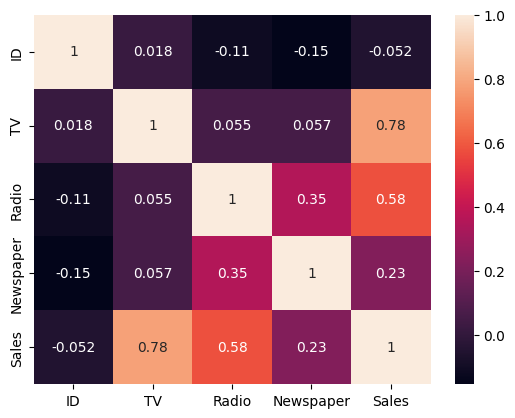

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [17]:
df.isnull().sum().sum() #no null values

np.int64(0)

In [22]:
X=df.drop('Sales',axis=1)
y=df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [24]:
X_train.shape
X_test.shape

(40, 4)

In [25]:
model=LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=model.predict(X_test)

In [28]:
X_score=model.score(X_test,y_test)
(X_score)

0.9284717132168754

In [29]:
MAE=np.mean(abs(y_test-y_pred))
MSE=np.mean((y_test-y_pred)**2)
RMSE=np.sqrt(MSE)


In [30]:
print("MAE:",MAE)
print("MSE:",MSE)
print("RMSE:",RMSE)

MAE: 1.1563032763047043
MSE: 2.117970006668223
RMSE: 1.455324708327397


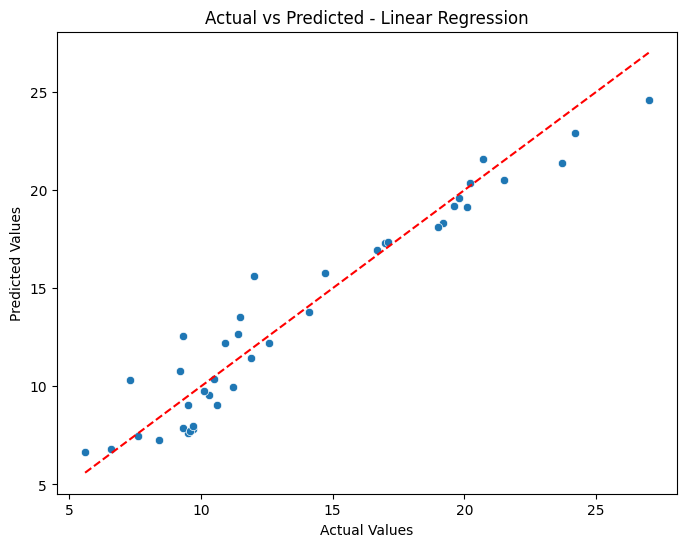

In [31]:
plt.figure(figsize=(8,6)) # default values
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.show()